In [9]:
import pandas as pd

# 파일 경로 설정
file_path = 'tofdrug.csv'

# tofdrug.csv 파일 읽기
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# 랜덤으로 100개의 행 선택
df_sample = df.sample(n=1000, random_state=1)

# 새로운 CSV 파일로 저장
output_path = 'tofdrug_sample1000.csv'
df_sample.to_csv(output_path, index=False)

output_path


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_34052\1732258116.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1')


'tofdrug_sample1000.csv'

In [13]:
# tofdrug_sample100.csv 파일 읽기
df_sample100 = pd.read_csv('tofdrug.csv', encoding='ISO-8859-1')

# drug_concept_id 및 source_name 컬럼에 따른 처방 통계 계산
prescription_stats = df_sample100.groupby(['drug_concept_id', 'source_name']).size().reset_index(name='count')

# 처방받은 횟수에 따라 내림차순으로 정렬
prescription_stats_sorted = prescription_stats.sort_values(by='count', ascending=False)

prescription_stats_sorted.head(10)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_34052\2264187919.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sample100 = pd.read_csv('tofdrug.csv', encoding='ISO-8859-1')


,drug_concept_id,source_name,count
412,19079658,Spironolactone 25mg tab,28710
82,957136,Furosemide 40mg tab,28287
575,21138024,Salbutamol 2.5mg nebule inhaler,26708
773,40165789,Enalapril 5mg tab,23732
680,36249739,Dextrose 5% 50ml btl,20804
1297,43296872,Acetylcysteine 20% 4ml inhaler,19925
830,40221384,Normal saline 0.9% 50ml btl,17824
202,1718698,Potassium chloride 40mEq/20ml inj,15554
420,19088169,Ambroxol 3mg/ml syrup,14800
111,1113143,Aspirin 100mg tab,13536


In [18]:
import re

# 약물 이름에서 용량과 관련된 정보를 제거하는 함수
def simplify_drug_name(name):
    # 용량, 용기, 제형 등을 제거
    simplified_name = re.sub(r'\s+\d+mg|\s+\d+%|\s+\d+ml|\s+tab|\s+btl|\s+inj|\s+nebule|\s+bag', '', name, flags=re.I)
    return simplified_name.strip()

# 'source_name' 컬럼을 정제하여 새로운 컬럼에 저장
df_sample100['simplified_drug_name'] = df_sample100['source_name'].apply(simplify_drug_name)

# simplified_drug_name 컬럼에 따른 처방 통계 재계산
simplified_prescription_counts = df_sample100.groupby('simplified_drug_name').size().reset_index(name='count')

# 처방받은 횟수에 따라 내림차순으로 정렬
simplified_prescription_counts_sorted = simplified_prescription_counts.sort_values(by='count', ascending=False)

# 상위 10개 출력
simplified_prescription_counts_sorted.head(10)


,simplified_drug_name,count
350,Dextrose,47642
848,Normal saline 0.9%,29010
1085,Spironolactone,28710
503,Furosemide,28287
1049,Salbutamol 2.5mg inhaler,26708
400,Enalapril,23934
17,Acetylcysteine inhaler,19925
441,Famotidine,16959
950,Potassium chloride 40mEq/20ml,15554
61,Ambroxol/ml syrup,14800


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_34052\1411895574.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="count", y="source_name", data=top_prescriptions, palette="coolwarm")


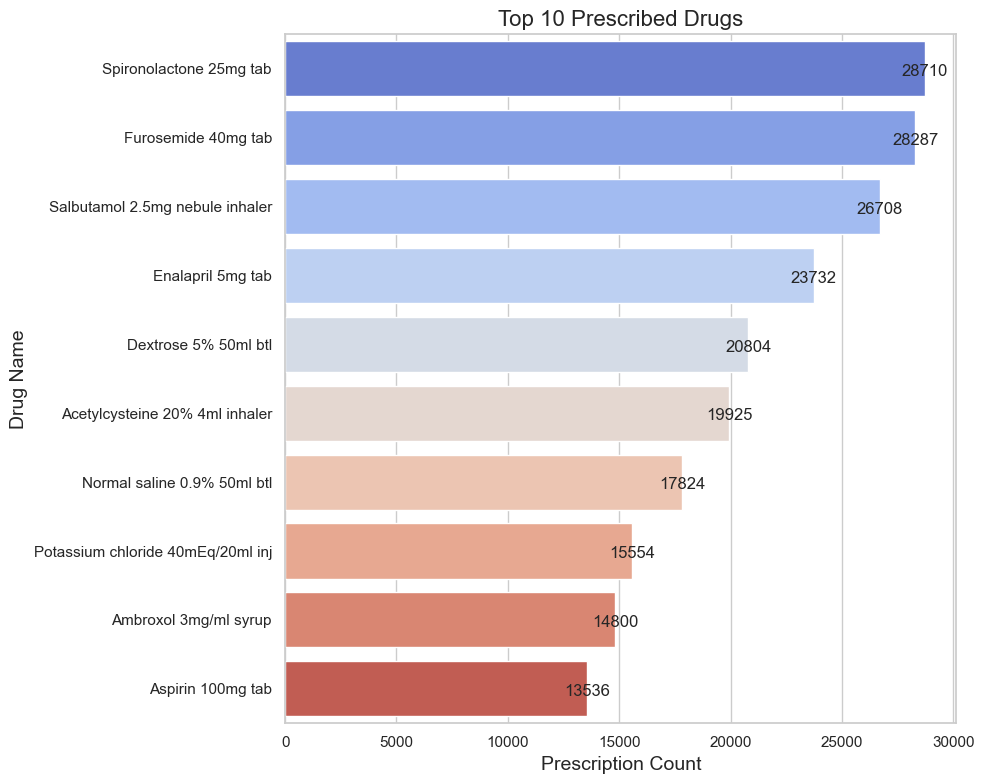

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화를 위한 데이터 준비
top_prescriptions = prescription_stats_sorted.head(10)

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 그래프 크기 설정
plt.figure(figsize=(10, 8))

# 수평 막대 그래프 생성
ax = sns.barplot(x="count", y="source_name", data=top_prescriptions, palette="coolwarm")

# 제목 및 라벨 설정
ax.set_title('Top 10 Prescribed Drugs', fontsize=16)
ax.set_xlabel('Prescription Count', fontsize=14)
ax.set_ylabel('Drug Name', fontsize=14)

# 값을 막대 위에 표시
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

plt.tight_layout()
plt.show()
